In [1]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [8]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/finaldata.csv')

In [9]:
# Step 2: Label encode the required columns

label_cols = ['data', 'is_cutoff','route_type']

# Apply label encoding
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
le_source = LabelEncoder()
le_dest = LabelEncoder()

df['source_center'] = le_source.fit_transform(df['source_center'])
df['destination_center'] = le_dest.fit_transform(df['destination_center'])



In [11]:
# Separate features and target
X = df.drop(columns=['actual_time'])  # drop the target
y = df['actual_time']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13
)



In [51]:
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, random_state=0)

gbt = gbt.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.6f}")
print(f"Test R²: {test_r2:.6f}")


Train MSE: 107.7975
Test MSE: 153.3787
Train R²: 0.999700
Test R²: 0.999570


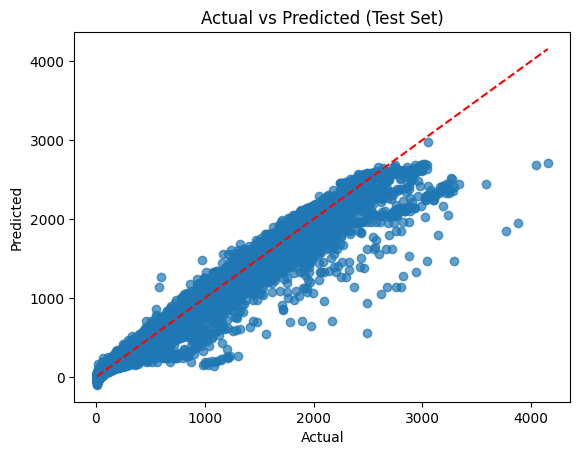

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect line
plt.show()


In [45]:
import pandas as pd
pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(5)


,0
osrm_time,0.419173
start_scan_to_end_scan,0.209937
delivery_efficiency,0.150875
actual_vs_osrm_time_ratio,0.049441
factor,0.049173


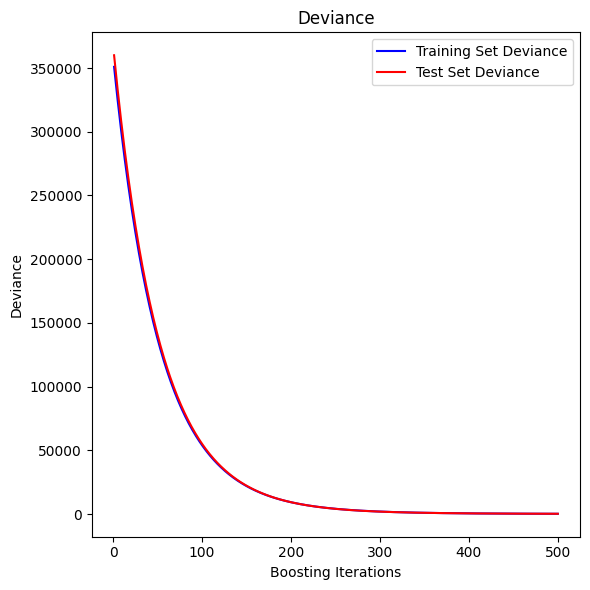

In [14]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

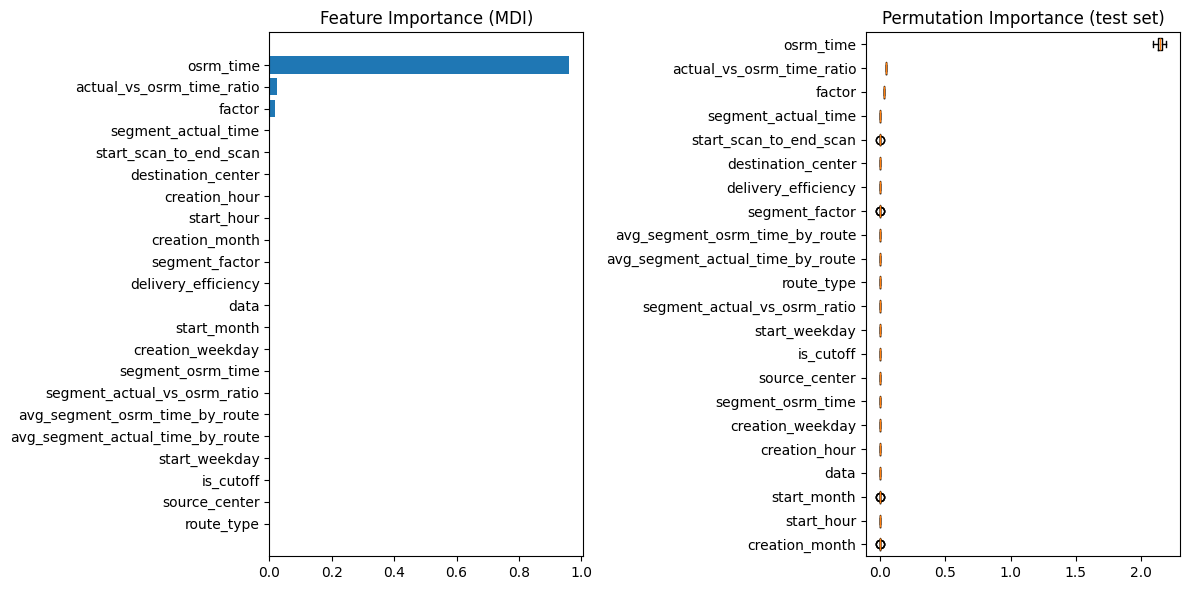

In [17]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
.
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(X.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()